## Background

source: https://openaccess.transparency.org.uk/

> UK Government departments are required by the Ministerial Code to publish the details of Ministers’ meetings with external organisations quarterly. This should cover all external meetings Ministers have whilst on official business.


## Import and clean

In [2]:
import pandas as pd


In [3]:
# your path will be different!

file = '/Users/aidanadmin/Documents/DATA/ALL_DATASETS/iw_uk_nov23.csv'

df = pd.read_csv(file, encoding = 'unicode_escape')

In [69]:
# first 3 rows

df.head(3)

,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
0,1,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-01,Criminal Law Commission,To discuss contempt issues,Attorney General's Office,2012,Q1,2012 Q1
1,2,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-02,Federalist Society,To discuss the EU Court of Human Rights,Attorney General's Office,2012,Q1,2012 Q1
2,3,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-02,Magistrates Association,To discuss the magistrates sentencing powers,Attorney General's Office,2012,Q1,2012 Q1


In [4]:
# 95k rows

df.shape

(95504, 12)

In [63]:
# show the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95504 entries, 0 to 95503
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recordId      95504 non-null  int64  
 1   person_id     95503 non-null  object 
 2   member_id     95503 non-null  float64
 3   rep_new       95503 non-null  object 
 4   policy_level  95503 non-null  object 
 5   date          95504 non-null  object 
 6   organisation  95494 non-null  object 
 7   purpose       95096 non-null  object 
 8   department    95504 non-null  object 
 9   year          95504 non-null  int64  
 10  quarter       95504 non-null  object 
 11  period        95504 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 8.7+ MB


In [64]:
# cast date column to date

df.date = df.date.apply(pd.to_datetime, format='mixed')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95504 entries, 0 to 95503
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   recordId      95504 non-null  int64         
 1   person_id     95503 non-null  object        
 2   member_id     95503 non-null  float64       
 3   rep_new       95503 non-null  object        
 4   policy_level  95503 non-null  object        
 5   date          95504 non-null  datetime64[ns]
 6   organisation  95494 non-null  object        
 7   purpose       95096 non-null  object        
 8   department    95504 non-null  object        
 9   year          95504 non-null  int64         
 10  quarter       95504 non-null  object        
 11  period        95504 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 8.7+ MB


In [14]:
# clean column names - first show all the column names

df.columns

Index(['RecordId', 'person_id', 'member_id', 'rep_new', 'policy_level', 'date',
       'organisation', 'purpose', 'department', 'Year', 'Quarter', 'Period'],
      dtype='object')

In [66]:
# edit the list of names as assign as the new list of column names

df.columns = ['recordId', 'person_id', 'member_id', 'rep_new', 'policy_level', 'date',
       'organisation', 'purpose', 'department', 'year', 'quarter', 'period']

In [79]:
# filter for just 2022 in the year column and assign to a variable

ly = df[df.year == 2022]

In [80]:
# 30 orgs that had the most meetings last year

ly.organisation.value_counts().head(30)

organisation
Local Government Association                                                                                                    29
Post Office                                                                                                                     19
BP                                                                                                                              18
Airbus                                                                                                                          18
National Grid                                                                                                                   18
EDF                                                                                                                             16
Rolls Royce                                                                                                                     16
Shell                                                                 

In [71]:
# filter for rows where BBC News is the organisation

df[df.organisation == 'BBC News']

,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
18199,18200,x6FOPcns,1572.0,Rt Hon Jeremy Hunt MP,Secretary of State,2015-01-11,BBC News,Roundtable discussion with BBC News editorial ...,Department of Health and Social Care,2015,Q4,2015 Q4
28056,28057,nfMorZ5b,1413.0,Rt Hon Chris Grayling MP,Lord President of the Council and Leader of th...,2016-05-18,BBC News,Interview,Whips' office,2016,Q2,2016 Q2
39022,39023,dougZwFw,223.0,Rt Hon Dr Liam Fox MP,Secretary of State,2017-06-15,BBC News,To discuss trade,Department for International Trade,2017,Q2,2017 Q2
40813,40832,JPL7AGmo,8.0,Rt Hon Theresa May MP,Prime Minister,2017-01-01,BBC News,General Discussion,Prime Minister's Office,2017,Q1,2017 Q1
46542,46561,WapfNXOe,3980.0,Mr Sam Gyimah,Minister of State,2018-05-18,BBC News,To discuss science and innovation,"Department for Business, Energy & Industrial S...",2018,Q2,2018 Q2
75047,75066,sdCPc48H,4134.0,Rt Hon Kwasi Kwarteng MP,Secretary of State,2021-05-05,BBC News,To discuss departmental priorities,"Department for Business, Energy & Industrial S...",2021,Q2,2021 Q2
80657,80679,woQhdPdk,4218.0,The Baroness Berridge,Parliamentary Under-Secretary,2021-05-28,BBC News,interview to discuss women's equality in Jerse...,Department for Education,2021,Q2,2021 Q2
81809,81831,1ngZMeUR,4020.0,George Freeman MP,Parliamentary Under-Secretary,2022-10-01,BBC News,To discuss levelling up in life sciences,"Department for Business, Energy & Industrial S...",2022,Q1,2022 Q1
95499,95524,EqHq5F1p,3944.0,Rt Hon Simon Hart MP,Parliamentary Secretary,2023-04-19,BBC News,To discuss HMG's priorities,Whips' office,2023,Q2,2023 Q2
95500,95525,EqHq5F1p,3944.0,Rt Hon Simon Hart MP,Parliamentary Secretary,2023-08-06,BBC News,To discuss HMG's priorities,Whips' office,2023,Q2,2023 Q2


<Axes: xlabel='year'>

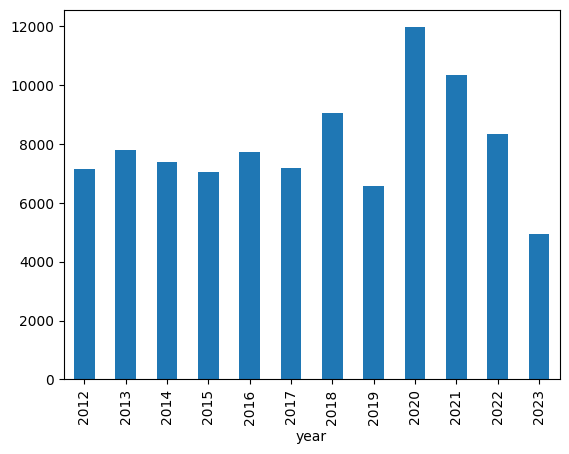

In [23]:
# what year had the most meetings? Plot results as bar chart (Note: this might require matplotlib library)

df.year.value_counts(sort = False).plot(kind = 'bar')

In [72]:
# Filter for this MP and see which organisations had the most meetings

df[df.rep_new == 'Rt Hon Kwasi Kwarteng MP'].organisation.value_counts().head(20)

organisation
National Grid                                                                                                                                                                   38
Shell                                                                                                                                                                           20
BP                                                                                                                                                                              20
EDF                                                                                                                                                                             19
Centrica                                                                                                                                                                        16
Oil and Gas UK                                                                              

## Questions: meeting who?

In [17]:
# how many different organisations in all? 58k

df.organisation.nunique()

58602

In [147]:
# which depts do the meeting?

df.department.value_counts()

department
Department for Business, Energy & Industrial Strategy    12840
Department for Digital, Culture, Media & Sport            7184
Department for Education                                  6980
HM Treasury                                               6781
Department for Levelling Up, Housing and Communities      6587
Department of Health and Social Care                      5755
Department for Transport                                  5274
Department for Work and Pensions                          5005
Department for Environment, Food & Rural Affairs          4506
Department for International Trade                        4475
Cabinet Office                                            4284
Home Office                                               3359
Office of the Secretary of State for Wales                2662
Office of the Secretary of State for Scotland             2538
Foreign & Commonwealth Office                             2376
Ministry of Defence                         

In [19]:
# which orgs were met most often since 2012?

df.organisation.value_counts().head(20)

organisation
Local Government Association         269
BAE Systems                          233
Airbus                               190
Confederation of British Industry    181
BT                                   154
National Farmers Union               154
Network Rail                         153
Federation of Small Businesses       140
Bar Council                          139
Rolls Royce                          138
British Chambers of Commerce         126
Universities UK                      126
BBC                                  124
National Grid                        118
British Retail Consortium            113
CBI                                  112
Barclays                             112
Google                               108
HSBC                                 108
Association of British Insurers      104
Name: count, dtype: int64

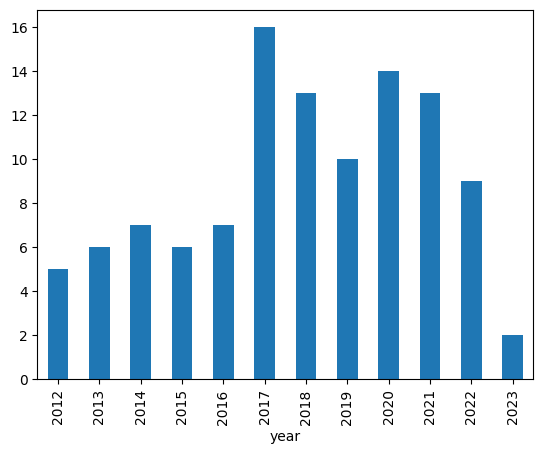

In [138]:
# when were ministers meeting Google in this period?

df[df.organisation == 'Google'].groupby('year').count()['organisation'].plot(kind = 'bar');

In [73]:
# most recent Google meetings?

df[df.organisation == 'Google'].sort_values('year', ascending = False).head(3)

,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
92986,93011,3cCGfc83,4507.0,Rt Hon Jeremy Quin MP,Paymaster General,2023-06-27,Google,Meeting to discuss the opportunities represent...,Cabinet Office,2023,Q2,2023 Q2
91409,91434,ZvG45buB,1582.0,Rt Hon Grant Shapps MP,Secretary of State,2023-01-02,Google,To discuss tech policy,"Department for Business, Energy & Industrial S...",2023,Q1,2023 Q1
85083,85108,U0c9xqqa,4874.0,Andrew Griffith MP,Parliamentary Secretary,2022-06-14,Google,Introductory meeting with Global Chief Executive,Cabinet Office,2022,Q2,2022 Q2


In [74]:
# filter for all rows where "purpose" column contains 'gambling' or 'betting' with upper- or lower-case letter

df[df.purpose.str.contains('gambling|betting', case = False) == True]

,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
4590,4591,X8QiVAam,247.0,Rt Hon Sir Oliver Letwin,Minister of State,2013-01-06,BACTA,Gambling Industry,Cabinet Office,2013,Q2,2013 Q2
5112,5113,X8QiVAam,247.0,Rt Hon Sir Oliver Letwin,Minister of State,2014-01-02,Association of British Bookmakers,Betting industry,Cabinet Office,2014,Q1,2014 Q1
5252,5253,0ZbA7k1o,4039.0,The Right Hon. the Lord Johnson of Marylebone,Parliamentary Secretary,2014-01-02,Association for British Bookmakers,Betting industry discussion,Cabinet Office,2014,Q1,2014 Q1
6546,6547,LVeiZj2V,214.0,The Rt Hon. the Lord Foster of Bath,Parliamentary Under-Secretary,2013-01-09,Responsible Gambling Trust,To discuss the organisation's research on gamb...,"Department for Levelling Up, Housing and Commu...",2013,Q3,2013 Q3
8557,8558,JJ3Ox3Vn,1584.0,John Penrose MP,Parliamentary Under-Secretary,2012-01-04,Ladbrokes,To discuss Off shore Gambling jobs,"Department for Digital, Culture, Media & Sport",2012,Q2,2012 Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
93746,93771,Gi80AXwX,4032.0,Rt Hon Stuart Andrew MP,Parliamentary Under-Secretary,2023-03-05,Gambling with Lives,To discuss the Gambling White Paper and gambli...,"Department for Digital, Culture, Media & Sport",2023,Q2,2023 Q2
93747,93772,Gi80AXwX,4032.0,Rt Hon Stuart Andrew MP,Parliamentary Under-Secretary,2023-03-05,Peers for Gambling Reform,To discuss the Gambling White Paper,"Department for Digital, Culture, Media & Sport",2023,Q2,2023 Q2
93753,93778,Gi80AXwX,4032.0,Rt Hon Stuart Andrew MP,Parliamentary Under-Secretary,2023-05-17,Gambling Commission,To discuss the Gambling White Paper and wider ...,"Department for Digital, Culture, Media & Sport",2023,Q2,2023 Q2
93755,93780,Gi80AXwX,4032.0,Rt Hon Stuart Andrew MP,Parliamentary Under-Secretary,2023-05-22,British Horseracing Authority,Introductory meeting to discuss the horseracin...,"Department for Digital, Culture, Media & Sport",2023,Q2,2023 Q2


## Organisations in gambling industry

In [146]:
# find rows where 'purpose' col mentions gambling or betting

print(len(df[df.purpose.str.contains('gambling|betting|gaming', case = False) == True]))
df[df.purpose.str.contains('gambling|betting|gaming', case = False) == True].head(2)

229


,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
4590,4591,X8QiVAam,247.0,Rt Hon Sir Oliver Letwin,Minister of State,2013-01-06,BACTA,Gambling Industry,Cabinet Office,2013,Q2,2013 Q2
5112,5113,X8QiVAam,247.0,Rt Hon Sir Oliver Letwin,Minister of State,2014-01-02,Association of British Bookmakers,Betting industry,Cabinet Office,2014,Q1,2014 Q1


NUMBER OF MINISTERIAL MEETINGS WITH ORGANISATIONS WHOSE NAME INCLUDES THE TERM "GAMBLING" OR "BETTING"


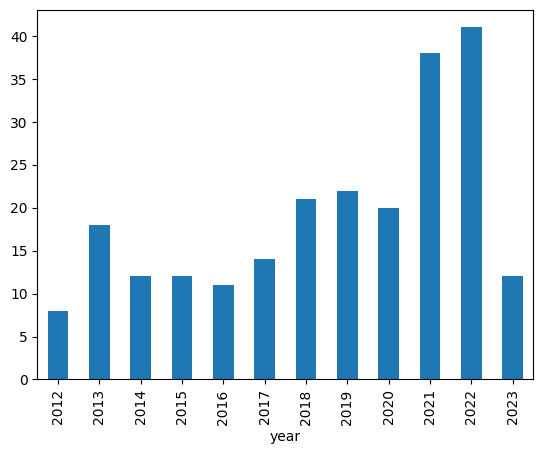

In [141]:
print('NUMBER OF MINISTERIAL MEETINGS WITH ORGANISATIONS WHOSE NAME INCLUDES THE TERM "GAMBLING" OR "BETTING"')

df[df.purpose.str.contains('gambling|betting|gaming', case = False) == True].sort_values('year').groupby('year')['department'].count().plot(kind = 'bar');



In [137]:
# Who did the Wales dept meet?

df[df.department == 'Office of the Secretary of State for Wales'].organisation.unique().tolist()

['Network Rail',
 'Tata Steel',
 'Royal Welsh Agriculture Society',
 'Country Land & Business Association',
 'National Farmers Union Cymru',
 'Hybu Cig Cymru',
 'Farmers Union of Wales',
 'Institute of Biological & Rural Sciences',
 'Rachelâ\x80\x99s Organics',
 'Aberystwyth University',
 'Dragon LNG',
 'Llandudno Hospitality Association',
 'Urdd',
 'Toyota',
 'Federation of Small Business',
 'University of Wales',
 'New Law Solicitors',
 'Afonwen Laundry',
 'Confederation of British Industry',
 'Airbus',
 'Mrs Bucket Cleaning Services',
 'Trojan Electronics',
 'Mi-Spaceâ\x80\x99s Urban Village Development',
 'BBC Trust',
 'Kids TaskForce',
 'Institute of Directors',
 'Valero',
 'Chelgate',
 'Centre for Cities',
 'Cardiff University',
 'The Firing Line Museum of the Welsh Soldier',
 'National Botanic Garden Wales',
 'S4C',
 'Experian',
 'Penderyn Distillery',
 'Rachel Lomax',
 'Creation Trust',
 'Sports Wales',
 'National Trust in Wales',
 'Cassidian',
 'Dwr Cymru/Welsh Water',
 'North

## 2022

In [75]:
# this has already been assigned to a variable 'ly'

ly.organisation.value_counts().head(10)

organisation
Local Government Association    29
Post Office                     19
BP                              18
Airbus                          18
National Grid                   18
EDF                             16
Rolls Royce                     16
Shell                           16
Bar Council                     15
Virgin Orbit                    14
Name: count, dtype: int64

In [81]:
# busiest depts for meetings

ly.department.value_counts().head(10)

department
Department for Business, Energy & Industrial Strategy    1525
Department for International Trade                        791
Department for Digital, Culture, Media & Sport            639
Department for Education                                  620
HM Treasury                                               619
Department of Health and Social Care                      578
Department for Levelling Up, Housing and Communities      513
Department for Transport                                  479
Foreign, Commonwealth & Development Office                424
Department for Environment, Food & Rural Affairs          424
Name: count, dtype: int64

In [83]:
# who is DCMS meeting?

ly[ly.department == 'Department for Digital, Culture, Media & Sport']


,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
81455,81477,4ZneyIwV,4503.0,Rt Hon Chris Philp MP,Parliamentary Under-Secretary,2022-05-01,Digital Skills Partnership,"To discuss digital skills shortages, DCMSâ l...","Department for Digital, Culture, Media & Sport",2022,Q1,2022 Q1
81456,81478,4ZneyIwV,4503.0,Rt Hon Chris Philp MP,Parliamentary Under-Secretary,2022-11-01,UK Finance,To understand UK Financeâs views on DCMS wor...,"Department for Digital, Culture, Media & Sport",2022,Q1,2022 Q1
81457,81479,4ZneyIwV,4503.0,Rt Hon Chris Philp MP,Parliamentary Under-Secretary,2022-11-01,HP,To develop an initial understanding of their c...,"Department for Digital, Culture, Media & Sport",2022,Q1,2022 Q1
81458,81480,4ZneyIwV,4503.0,Rt Hon Chris Philp MP,Parliamentary Under-Secretary,2022-11-01,Priya Lakhani,To discuss the Online Safety Bill and AI.,"Department for Digital, Culture, Media & Sport",2022,Q1,2022 Q1
81459,81481,4ZneyIwV,4503.0,Rt Hon Chris Philp MP,Parliamentary Under-Secretary,2022-12-01,Lawn Tennis Association; England and Wales Cri...,To meet sporting sector leads and hear their v...,"Department for Digital, Culture, Media & Sport",2022,Q1,2022 Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
88837,88862,j2ScCO7s,4728.0,The Lord Parkinson of Whitley Bay,Parliamentary Under-Secretary,2022-11-11,Gloucester Culture Trust,Discussion of ACE NPO round (gloucestershire l...,"Department for Digital, Culture, Media & Sport",2022,Q4,2022 Q4
88838,88863,j2ScCO7s,4728.0,The Lord Parkinson of Whitley Bay,Parliamentary Under-Secretary,2022-11-11,Gloucestershire Library,To see the work of the library,"Department for Digital, Culture, Media & Sport",2022,Q4,2022 Q4
88839,88864,j2ScCO7s,4728.0,The Lord Parkinson of Whitley Bay,Parliamentary Under-Secretary,2022-11-18,Shrewsbury Flaxmill,To attend the re-opening of the restored mill ...,"Department for Digital, Culture, Media & Sport",2022,Q4,2022 Q4
88840,88865,j2ScCO7s,4728.0,The Lord Parkinson of Whitley Bay,Parliamentary Under-Secretary,2022-11-30,National Trust,Visit to Chartwell and Portraiture exhibition,"Department for Digital, Culture, Media & Sport",2022,Q4,2022 Q4


In [84]:
ly_dcms = ly[ly.department == 'Department for Digital, Culture, Media & Sport']

In [85]:
ly_dcms[:3]

,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
81455,81477,4ZneyIwV,4503.0,Rt Hon Chris Philp MP,Parliamentary Under-Secretary,2022-05-01,Digital Skills Partnership,"To discuss digital skills shortages, DCMSâ l...","Department for Digital, Culture, Media & Sport",2022,Q1,2022 Q1
81456,81478,4ZneyIwV,4503.0,Rt Hon Chris Philp MP,Parliamentary Under-Secretary,2022-11-01,UK Finance,To understand UK Financeâs views on DCMS wor...,"Department for Digital, Culture, Media & Sport",2022,Q1,2022 Q1
81457,81479,4ZneyIwV,4503.0,Rt Hon Chris Philp MP,Parliamentary Under-Secretary,2022-11-01,HP,To develop an initial understanding of their c...,"Department for Digital, Culture, Media & Sport",2022,Q1,2022 Q1


In [86]:
# print the 'purpose' value for each row in the ly_dcms filtered dataset

for x in ly_dcms.purpose:
    print(x)

To discuss digital skills shortages, DCMSâ leadership of the Prime Ministerâs Stocktake, and plans to revive the Digital Skills Partnership Board (DSP).
To understand UK Financeâs views on DCMS work on digital identity policy.
To develop an initial understanding of their commercial and policy interests and seek out areas for potential collaboration.
To discuss the Online Safety Bill and AI.
To meet sporting sector leads and hear their views on the Gambling Act Review.
To discuss Accentureâs views on the challenges and opportunities around Digital Skills in the UK.
Visit to the Revolut HQ, to establish a positive relationship and to develop an understanding of their future plans for growing the business, learn what their policy priorities are and see some of the cutting edge technologies their engineers are developing firsthand.
To develop an initial understanding of their commercial and policy interests and seek out areas for potential collaboration.
Introductory meeting and to

## Israel

In [186]:
# how many meetings each year where 'purpose' involved Israel?

df[df.purpose.str.contains('israel|israeli', case = False) == True].sort_values('year').groupby('year')['department'].count()


year
2012     3
2013     1
2014     1
2016     4
2017     3
2018    15
2019     3
2021     4
2022     6
2023     7
Name: department, dtype: int64

In [61]:
for x in df[df.purpose.str.contains('israel|israeli', case = False) == True].purpose:
    print(x)

To discuss upcoming trip to Israel
To discuss UK-Israeli cultural, sporting relations and broadcasting issues
To discuss the work of the organisation in Israel.
To discuss the charityï¿½s projects in Israel and the Occupied Palestinian Territories.
To discuss UK and Israel economies
To discuss Israel and OPTs
To discuss Israel and OPTs
To attend Annual Israeli Biomed Exhibition and discuss UK/Israeli Biomed cooperation.
To discuss Israeli issues
Meeting to discuss trade opportunities in the Uk and Israel
Meeting to discuss trade opportunities in the Uk and Israel
Discussion on BICOM report on Israeli-Palestinian Peacebuilding projects
To discuss trip to Israel and the innovation ecosystem
To discuss inward investment opportunities and further UK-Israel innovation collaboration
To discuss Israeli politics 
To discuss the variety of human rights concerns in Israel and the OPTs from an Israeli NGO perspective and to demonstrate support for the work of HRDs in the year of the 70th annivers

## Groupby

In [87]:
# filter for topics with sub-string 'semitism' then group by year and get a count on number of .... departments

df[df.purpose.str.contains('semitism', case = False) == True].groupby('year')['department'].count()

year
2014     2
2015     3
2016     5
2017     3
2018     1
2019     3
2020     4
2021    16
2022     4
2023     3
Name: department, dtype: int64

## General syntax for slicing the df

In [88]:
# rows selection

df[4:7]

,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
4,5,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-03,Sir Daniel Bethlehem QC & Sir Jeffery Jowell QC,To discuss Bahrain issues,Attorney General's Office,2012,Q1,2012 Q1
5,6,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-03,Young Barristers Committee,Introductory meeting,Attorney General's Office,2012,Q1,2012 Q1
6,7,UT2CILAj,337.0,The Rt Hon. the Lord Garnier QC,Solicitor General,2012-01-01,Balfour Beatty,To discuss Deferred Prosecution Agreements,Attorney General's Office,2012,Q1,2012 Q1


In [89]:
# 3 particular cols

df[['organisation', 'purpose', 'department']]

,organisation,purpose,department
0,Criminal Law Commission,To discuss contempt issues,Attorney General's Office
1,Federalist Society,To discuss the EU Court of Human Rights,Attorney General's Office
2,Magistrates Association,To discuss the magistrates sentencing powers,Attorney General's Office
3,Bar Council,Regular catch up meeting,Attorney General's Office
4,Sir Daniel Bethlehem QC & Sir Jeffery Jowell QC,To discuss Bahrain issues,Attorney General's Office
...,...,...,...
95499,BBC News,To discuss HMG's priorities,Whips' office
95500,BBC News,To discuss HMG's priorities,Whips' office
95501,"Gary Gibbon; Political Editor, Channel 4",To discuss HMG's priorities,Whips' office
95502,The Daily Telegraph,To discuss HMG's priorities,Whips' office


In [90]:
# last 4 rows

df[-4:]

,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
95500,95525,EqHq5F1p,3944.0,Rt Hon Simon Hart MP,Parliamentary Secretary,2023-08-06,BBC News,To discuss HMG's priorities,Whips' office,2023,Q2,2023 Q2
95501,95526,EqHq5F1p,3944.0,Rt Hon Simon Hart MP,Parliamentary Secretary,2023-10-06,"Gary Gibbon; Political Editor, Channel 4",To discuss HMG's priorities,Whips' office,2023,Q2,2023 Q2
95502,95527,EqHq5F1p,3944.0,Rt Hon Simon Hart MP,Parliamentary Secretary,2023-06-15,The Daily Telegraph,To discuss HMG's priorities,Whips' office,2023,Q2,2023 Q2
95503,95528,EqHq5F1p,3944.0,Rt Hon Simon Hart MP,Parliamentary Secretary,2023-06-15,"Tim Shipman; Chief Political Commentator, The ...",To discuss HMG's priorities,Whips' office,2023,Q2,2023 Q2


In [91]:
# one particular cell

print(df.iat[0, 4])

Attorney General


In [92]:
# rows, cols. Here: first 120 rows, cols 3 and 4

df.iloc[:10,3:5]

,rep_new,policy_level
0,Rt Hon Dominic Grieve QC,Attorney General
1,Rt Hon Dominic Grieve QC,Attorney General
2,Rt Hon Dominic Grieve QC,Attorney General
3,Rt Hon Dominic Grieve QC,Attorney General
4,Rt Hon Dominic Grieve QC,Attorney General
5,Rt Hon Dominic Grieve QC,Attorney General
6,The Rt Hon. the Lord Garnier QC,Solicitor General
7,The Rt Hon. the Lord Garnier QC,Solicitor General
8,The Rt Hon. the Lord Garnier QC,Solicitor General
9,The Rt Hon. the Lord Garnier QC,Solicitor General


In [93]:
# first 4 rows via iloc

df.iloc[:4]

,recordId,person_id,member_id,rep_new,policy_level,date,organisation,purpose,department,year,quarter,period
0,1,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-01,Criminal Law Commission,To discuss contempt issues,Attorney General's Office,2012,Q1,2012 Q1
1,2,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-02,Federalist Society,To discuss the EU Court of Human Rights,Attorney General's Office,2012,Q1,2012 Q1
2,3,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-02,Magistrates Association,To discuss the magistrates sentencing powers,Attorney General's Office,2012,Q1,2012 Q1
3,4,teXRvkZh,16.0,Rt Hon Dominic Grieve QC,Attorney General,2012-01-02,Bar Council,Regular catch up meeting,Attorney General's Office,2012,Q1,2012 Q1


In [94]:
# all rows, but just first 4 cols

df.iloc[:,:4]

,recordId,person_id,member_id,rep_new
0,1,teXRvkZh,16.0,Rt Hon Dominic Grieve QC
1,2,teXRvkZh,16.0,Rt Hon Dominic Grieve QC
2,3,teXRvkZh,16.0,Rt Hon Dominic Grieve QC
3,4,teXRvkZh,16.0,Rt Hon Dominic Grieve QC
4,5,teXRvkZh,16.0,Rt Hon Dominic Grieve QC
...,...,...,...,...
95499,95524,EqHq5F1p,3944.0,Rt Hon Simon Hart MP
95500,95525,EqHq5F1p,3944.0,Rt Hon Simon Hart MP
95501,95526,EqHq5F1p,3944.0,Rt Hon Simon Hart MP
95502,95527,EqHq5F1p,3944.0,Rt Hon Simon Hart MP
